# Pandas 시각화
- 판다스의 메서드가. 내부적으로 matplotlib 을 작동시킨다
- 하지만 그래프에 추가 설정은  matplotlib 을 사용한다.





판다스 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.---> 여기서 plot은 말그대로 그냥 그래프를 그리겠다는 뜻



- df.plot(kind = 'line')/// 함수사용                        
- df.plot.hist()  accessor사용// df가 hist(기능을 사용할 수있게 )로 accessor하게 해준다. 사용

- plt.figure(figsize)---> 지원함


- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot (선으로 나타내는 히스토 그램)
    - 'pie' : pie plot
    - 'scatter' : scatter plot

In [ ]:
# 핸드폰 쓰기.

# 데이터가 매개 변수가 님  // plot 사용

matplotlib를 이용해 여러 설정들 가능

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

In [2]:
tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

In [4]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [53]:
tips['sex'].value_counts()  #==Series

Male      157
Female     87
Name: sex, dtype: int64

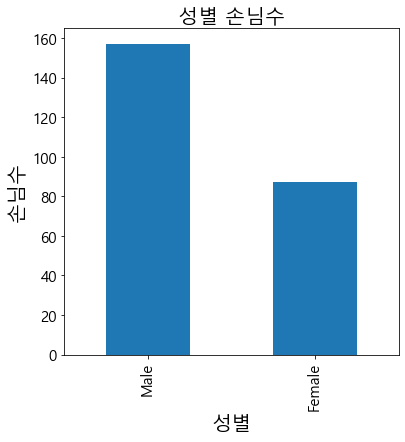

In [17]:
# 성별 : 남, 여성의 수
plt.figure(figsize=(6,6))

tips['sex'].value_counts().plot(kind = 'bar')#, title ='손님수', figsize=(10,10))
#Series.bar() : index가 x축, value가 y축

plt.title('성별 손님수')
plt.xlabel('성별')
plt.ylabel('손님수')
plt.show()

In [10]:
# matplot plt 사용해서 그린것 비교
a=tips['sex'].value_counts()
a

Male      157
Female     87
Name: sex, dtype: int64

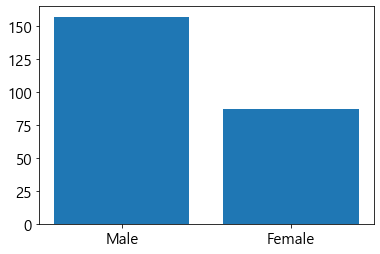

In [11]:
plt.bar(a.index,a)# 비교 
plt.show()

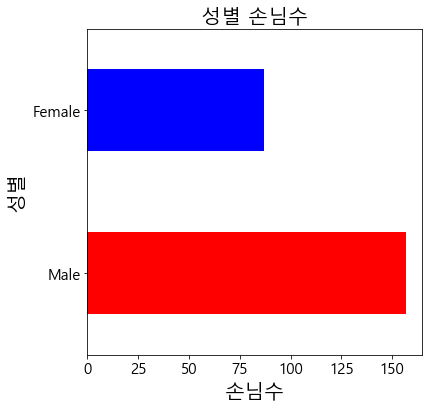

In [30]:
plt.figure(figsize=(6,6))

tips['sex'].value_counts().plot(kind = 'barh',color= ['r','b'], rot = 0)#, title ='손님수', figsize=(10,10))
#Series.bar() : index가 x축, value가 y축

plt.title('성별 손님수')
plt.ylabel('성별')
plt.xlabel('손님수')
plt.show()

In [54]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

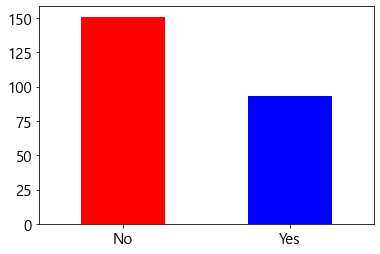

In [28]:
sm = tips['smoker'].value_counts()
sm.plot.bar(color= ['r','b'], rot = 0)  # plot 이 bar에 연결해주는 개념
#x = sm.index,y= sm// 색지정 가능



plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


In [39]:
agg_df

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


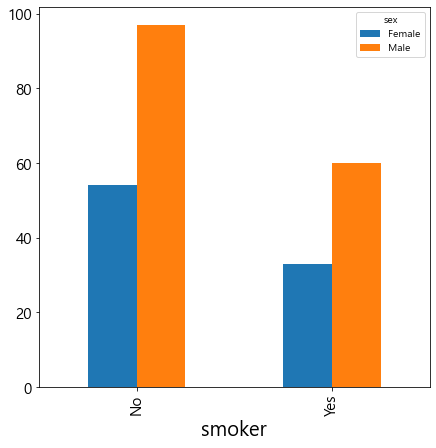

In [38]:
# 흡연자,비흡연자 성별당 인원수 

agg_df=tips.pivot_table(index='smoker', columns ='sex', values ='tip', aggfunc ='count') # //value 집계대상인데 nan이없으니 넣고 count(데이터개수 세기)--
agg_df.plot.bar(figsize = (7,7))  # 카운트 행을 세기만 함 
plt.show()

In [40]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


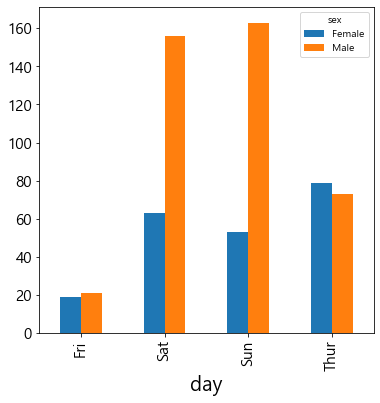

In [50]:
#요일별(day) 별 성별(sex) 손님 // 손님의 총수(size)
# DF의 index: ticks - 1차 그룹, columns- 각ticks마다 나눠져서 나옴-(2차그룹)
tips.pivot_table(index = 'day', columns ='sex', values ='size',aggfunc ='sum').plot.bar(figsize=(6,6))#.plot(kind = 'bar')
plt.show()


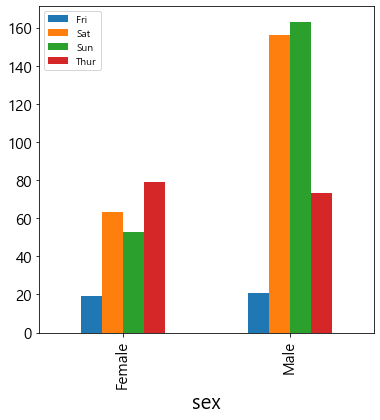

In [47]:
tips.pivot_table(index = 'sex', columns ='day', values ='size',aggfunc ='sum').plot.bar(figsize=(6,6))
plt.legend(loc='upper left')
plt.show()

In [56]:
tips.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

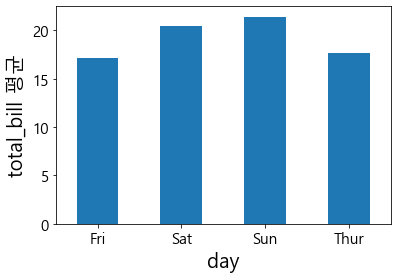

In [59]:
tips.groupby('day')['total_bill'].mean().plot.bar(rot =0)
plt.ylabel('total_bill 평균')
plt.show()

In [60]:
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 파이차트

<AxesSubplot:ylabel='day'>

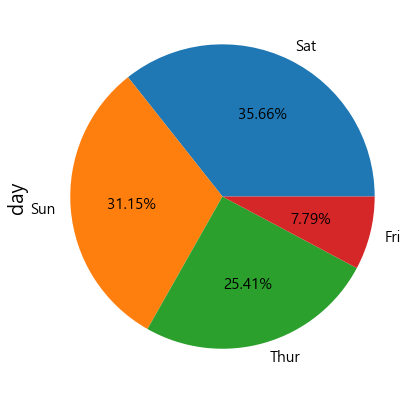

In [65]:
tips['day'].value_counts().plot.pie(figsize =(7,7), autopct ="%.2f%%", fontsize= 15) # textprops 는 적용 안됨

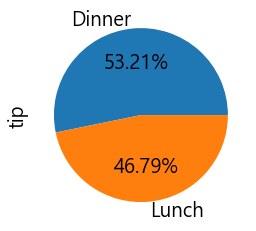

In [77]:
tips.groupby('time')['tip'].mean().plot(kind ='pie', autopct ='%.2f%%',fontsize = 20);  # ; 세미콜론 
#plt.show()

## 히스토그램, KDE(밀도그래프)

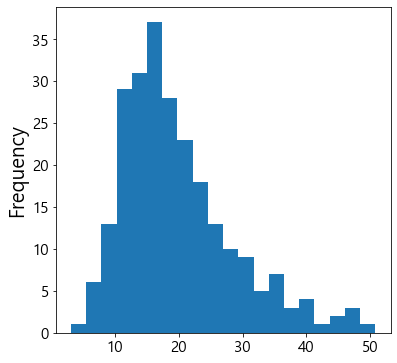

In [84]:
#tips['total_bill'].plot.hist(figsize =(6,6), bins = 20)
tips['total_bill'].plot(kind ='hist',figsize =(6,6), bins = 20)
plt.show() # 범위에 해당되는 데이터의 개수 들을 그림

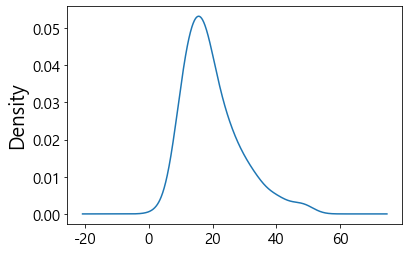

In [86]:
#kde
tips['total_bill'].plot.kde()
plt.show()  # 확률형태

## Boxplot (상자그래프)

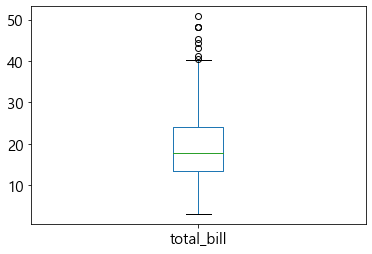

In [89]:
# series
tips['total_bill'].plot.box()#whis =3)
plt.show()

In [93]:
tips[['total_bill','tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


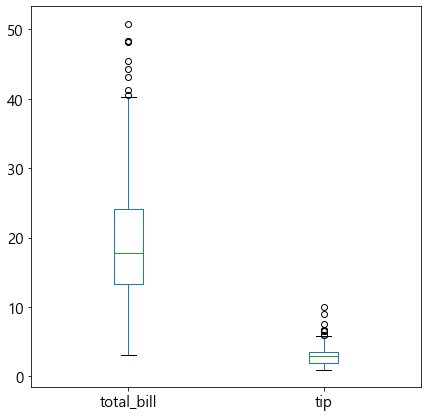

In [94]:
# dataframe
tips[['total_bill','tip']].plot(kind = 'box',figsize =(7,7))
plt.show()

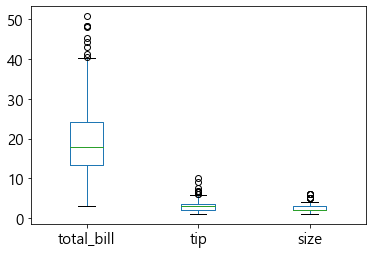

In [96]:
tips.plot(kind ='box');  # 숫자형태의 컬럼만 갖고 그려지뮤

## scatter plot (산점도) 
- Series 로는 그리지 못하고 
- DataFrame 으로만 그릴 수 있다.
- X에 올 컬럼명, Y에 올 컬럼명을 정해줘야한다.

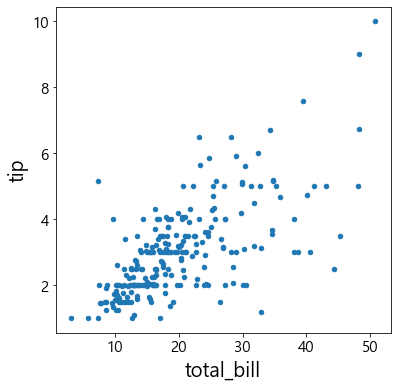

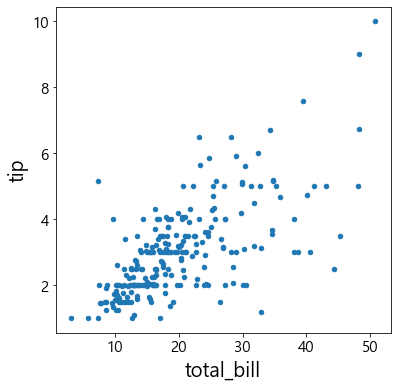

In [100]:
tips.plot(kind ='scatter', x = 'total_bill', y= 'tip', figsize =(6,6)) # X에 올 컬럼명, Y에 올 컬럼명
tips.plot.scatter( x = 'total_bill', y= 'tip', figsize =(6,6))
plt.show()

In [99]:
tips[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


------------------------------------------------------------------------------------------------------------

# 파이썬의 날짜/시간  다루기 
- datetime 모듈
- datetime 클래스 - 날짜 / 시간
- datetime.date : 날짜
- datetime.time: 시간 

In [170]:
## 파이썬ㅇ에서~~!!!

In [2]:
import datetime # 모듈 

In [162]:
c=datetime.datetime.now() # 현재(실행시점)일시를 datetime 객체로 반환
c

datetime.datetime(2021, 3, 12, 9, 34, 55, 389677)

In [163]:
# 특정 일시를 넣어서 객체 생성
date = datetime.datetime(2000,4 , 5)  # 연,월,일
date

datetime.datetime(2000, 4, 5, 0, 0)

In [4]:
date2 = datetime.datetime(2010,5 , 20, 15, 32, 5)  # 초는 생략해도 시,분까지는 꼭 넣어줘야함 
date2 = datetime.datetime.now()
date2

datetime.datetime(2021, 3, 13, 18, 5, 57, 551037)

In [118]:
# datetime의 특정 부분갖고오기
print(date2.year, date2.month, date2.day, date2.hour, date2.minute, date2.second)
print('요일:', date2.weekday())  # 0 :월 , 1:화 .....6일

2021 3 11 16 17 26
요일: 3


In [119]:
date2.isocalendar() #--> (년도 , 주차(몇번째주), 요일)  # 여기에서 요일은 월:1,~ 일:7

(2021, 10, 4)

### datetime 관련.
https://docs.python.org/ko/3/library/datetime.html#strftime-strptime-behavior 

In [5]:
#datetime -> 문자열.
#datetime.strftime("format문자열")
# %Y: 4자리 년도, %m:월, %d:일, %H:24시간, %M:분, %S:초, %A
# 월~초: 2자리

date3=date2.strftime('%Y/%m/%d/ %H:%M:%S %A') # datetime 객체를 원하는 문자열 형식으로 반환
print(type(date3))
date3

<class 'str'>


'2021/03/13/ 18:05:57 Saturday'

In [129]:
# 문자열 -> datetime
# strptime
d = datetime.datetime.strptime("2020/10/20", '%Y/%m/%d')
d

datetime.datetime(2020, 10, 20, 0, 0)

In [128]:
d.day

20

# 판다스에서 datetime 사용

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
d = [datetime.datetime.now()]*10
df = pd.DataFrame({
    "age": np.random.randint(10,100,10),
    "day":d
})

print(df.shape)
df

(10, 2)


,age,day
0,97,2021-03-13 18:12:35.728163
1,27,2021-03-13 18:12:35.728163
2,23,2021-03-13 18:12:35.728163
3,56,2021-03-13 18:12:35.728163
4,96,2021-03-13 18:12:35.728163
5,66,2021-03-13 18:12:35.728163
6,96,2021-03-13 18:12:35.728163
7,57,2021-03-13 18:12:35.728163
8,23,2021-03-13 18:12:35.728163
9,21,2021-03-13 18:12:35.728163


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   age     10 non-null     int32         
 1   day     10 non-null     datetime64[ns]
 2   월       10 non-null     int64         
 3   요일      10 non-null     int64         
dtypes: datetime64[ns](1), int32(1), int64(2)
memory usage: 408.0 bytes


### dt accessor : datetime 타입의 값들을 처리하는 기능을 제공

In [169]:
# Series 타입: datetime64[ns]
df['day'].dt.year # 원소별로 날짜/ 시간에서 원하는 항목들을 조회

0    2021
1    2021
2    2021
3    2021
4    2021
5    2021
6    2021
7    2021
8    2021
9    2021
Name: day, dtype: int64

In [138]:
df['day'].dt.month

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: day, dtype: int64

In [ ]:
# day: 일, hour: 시간, minute:분, second: 초 
# week :주 ( 몇번째 주인지 )
# dayofweek: 요일(0 월, 6:일)
# dayofyear
# isocalendar() - (년 , 주차, 요일 ) 1:월~ 7:일  --> DataFrame

In [140]:
df['day'].dt.isocalendar()

,year,week,day
0,2021,10,4
1,2021,10,4
2,2021,10,4
3,2021,10,4
4,2021,10,4
5,2021,10,4
6,2021,10,4
7,2021,10,4
8,2021,10,4
9,2021,10,4


In [142]:
df['월']= df['day'].dt.month

In [143]:
df

,age,day,월
0,18,2021-03-11 16:34:43.373560,3
1,40,2021-03-11 16:34:43.373560,3
2,33,2021-03-11 16:34:43.373560,3
3,67,2021-03-11 16:34:43.373560,3
4,40,2021-03-11 16:34:43.373560,3
5,34,2021-03-11 16:34:43.373560,3
6,68,2021-03-11 16:34:43.373560,3
7,65,2021-03-11 16:34:43.373560,3
8,18,2021-03-11 16:34:43.373560,3
9,46,2021-03-11 16:34:43.373560,3


In [209]:
df['요일']=df['day'].dt.dayofweek
df

KeyError: 'day'

In [144]:
df.groupby('월')['age'].mean()

월
3    42.9
Name: age, dtype: float64

In [10]:
df['day'].dt.isocalendar()

,year,week,day
0,2021,10,6
1,2021,10,6
2,2021,10,6
3,2021,10,6
4,2021,10,6
5,2021,10,6
6,2021,10,6
7,2021,10,6
8,2021,10,6
9,2021,10,6


In [150]:
pd.concat([df, df['day'].dt.isocalendar()], axis = 1)

,age,day,월,요일,year,week,day
0,18,2021-03-11 16:34:43.373560,3,3,2021,10,4
1,40,2021-03-11 16:34:43.373560,3,3,2021,10,4
2,33,2021-03-11 16:34:43.373560,3,3,2021,10,4
3,67,2021-03-11 16:34:43.373560,3,3,2021,10,4
4,40,2021-03-11 16:34:43.373560,3,3,2021,10,4
5,34,2021-03-11 16:34:43.373560,3,3,2021,10,4
6,68,2021-03-11 16:34:43.373560,3,3,2021,10,4
7,65,2021-03-11 16:34:43.373560,3,3,2021,10,4
8,18,2021-03-11 16:34:43.373560,3,3,2021,10,4
9,46,2021-03-11 16:34:43.373560,3,3,2021,10,4


In [151]:
df2 = df.set_index('day')
df2

,age,월,요일
day,,,
2021-03-11 16:34:43.373560,18,3,3
2021-03-11 16:34:43.373560,40,3,3
2021-03-11 16:34:43.373560,33,3,3
2021-03-11 16:34:43.373560,67,3,3
2021-03-11 16:34:43.373560,40,3,3
2021-03-11 16:34:43.373560,34,3,3
2021-03-11 16:34:43.373560,68,3,3
2021-03-11 16:34:43.373560,65,3,3
2021-03-11 16:34:43.373560,18,3,3


In [ ]:
# datetime 타입의 시계열 index를 생성할때 쓴다.
#pd.date_range(시작날짜, freq= '변화규칙', periods = '개수') # 규칙적으로 증가/감소 하는 datetime값을 가지는 index를 생성

In [15]:
pd.date_range('2000/1/1', freq= 'M', periods = 5)  # 2000년 1월 1일 부터 1개월씩 증가하는 날짜 5개 생성
pd.date_range('2000/1/1', freq= 'MS', periods = 5) # 첫번째 날짜 부터시작 MS

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [17]:
pd.date_range('2000/1/1', freq= 'Y', periods = 5)

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [16]:
pd.date_range('2000/1/1', freq= '5YS', periods = 5)


# freq - 간격을 지정 (Y: 년, M: 월, D:일, H:시간, T:분, S:초)
#       YS,MS,HS,TS  : 첫번째날짜/시간,  S생략 마지막
# 문자앞에 정수 : 간격

DatetimeIndex(['2000-01-01', '2005-01-01', '2010-01-01', '2015-01-01',
               '2020-01-01'],
              dtype='datetime64[ns]', freq='5AS-JAN')

In [156]:
pd.date_range('2000/1/1', freq= 'D', periods = 5)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [159]:
pd.date_range('2000/1/1', freq= '5D', periods = 5)
pd.date_range('2000/1/1', freq= '-5D', periods = 5)

DatetimeIndex(['2000-01-01', '1999-12-27', '1999-12-22', '1999-12-17',
               '1999-12-12'],
              dtype='datetime64[ns]', freq='-5D')

In [161]:
pd.date_range('2000/1/1', freq= '-5YS', periods = 5)

DatetimeIndex(['2000-01-01', '1995-01-01', '1990-01-01', '1985-01-01',
               '1980-01-01'],
              dtype='datetime64[ns]', freq='-5AS-JAN')

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pls

In [180]:
value =np.round(np.random.normal(5,3, size=(10,3)), 2)
value.shape
index = pd.date_range('2020/1/1', freq ="M", periods = 10)

df = pd.DataFrame(value, index = index, columns=['no1','no2','no3'])
df

,no1,no2,no3
2020-01-31,5.11,8.26,10.10
2020-02-29,10.06,4.42,7.95
2020-03-31,5.24,7.77,-0.29
2020-04-30,5.11,4.93,3.30
2020-05-31,4.56,2.90,0.62
2020-06-30,-0.04,2.95,5.82
2020-07-31,6.92,10.97,3.99
2020-08-31,6.23,7.54,1.67
2020-09-30,1.06,6.39,3.04
2020-10-31,3.45,2.38,8.18


In [184]:
df.info() # DatetimeIndex: 10 entries, 2020-01-31 to 2020-10-31

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2020-01-31 to 2020-10-31
Freq: M
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no1     10 non-null     float64
 1   no2     10 non-null     float64
 2   no3     10 non-null     float64
dtypes: float64(3)
memory usage: 320.0 bytes


# line plot

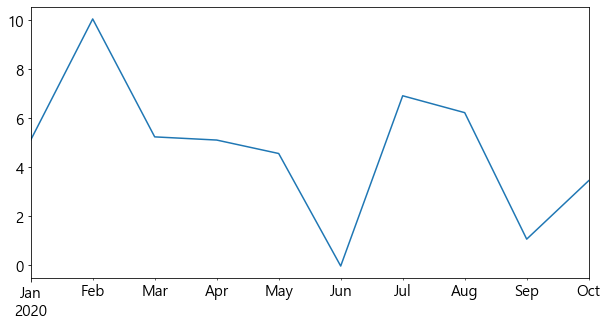

In [189]:
#Series/DF  X축 index, Y축 :value
#df['no1'].plot(kind = 'line', figsize =(10,5))
df['no1'].plot( figsize =(10,5))  # kind 의 defalut:  line 생략가능
plt.show()

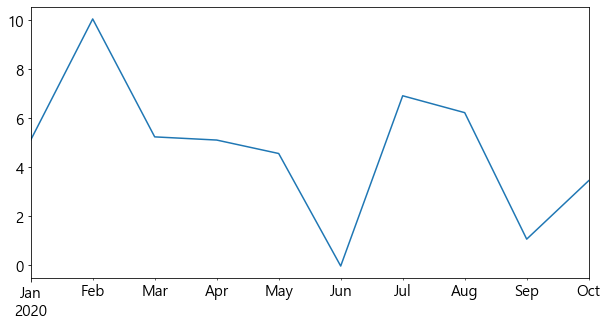

In [190]:
df['no1'].plot.line( figsize =(10,5))
plt.show()

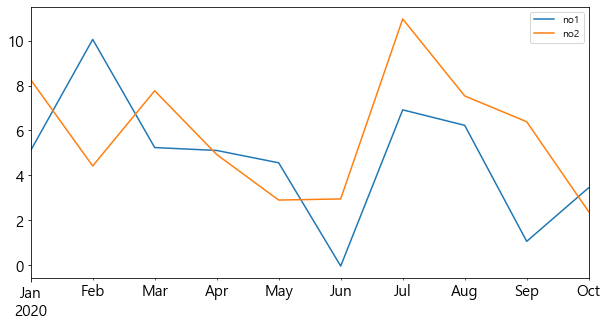

In [193]:
# DataFrame  X :index, Y :숫자형 컬럼들  --- 컴럼별로 선그래프를 각각 그려준다.
df[['no1', 'no2']].plot(figsize =(10,5))
plt.show()

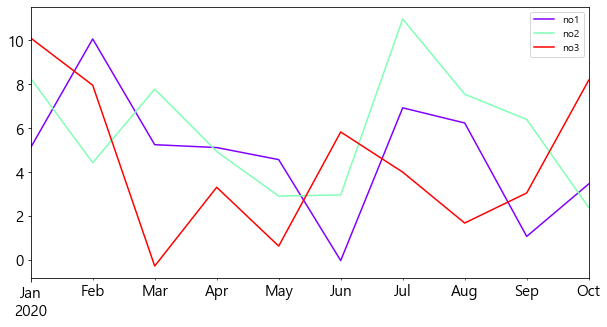

In [202]:
df.plot(figsize= (10,5), cmap = 'rainbow') # matplotlib 을 사용해서 그릴 때는 3개를 각각 그려줘야하지~~!
plt.show()

In [206]:
df['no3_cumsum']=df['no3'].cumsum()  # cum 누적  // cumsum :누적 합계
df

,no1,no2,no3,no3_cumsum
2020-01-31,5.11,8.26,10.10,10.10
2020-02-29,10.06,4.42,7.95,18.05
2020-03-31,5.24,7.77,-0.29,17.76
2020-04-30,5.11,4.93,3.30,21.06
2020-05-31,4.56,2.90,0.62,21.68
2020-06-30,-0.04,2.95,5.82,27.50
2020-07-31,6.92,10.97,3.99,31.49
2020-08-31,6.23,7.54,1.67,33.16
2020-09-30,1.06,6.39,3.04,36.20
2020-10-31,3.45,2.38,8.18,44.38


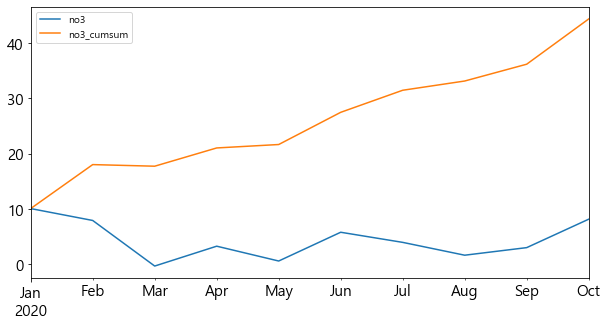

In [208]:
df[['no3','no3_cumsum']].plot(figsize =(10,5))
plt.show()  # no3 , 와 no3 누적 그래프 

In [ ]:
# 강사님  함수 만든거 보기